#Install Segments-ai Package and Download the datasets




In [1]:
!pip install segments-ai

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 7.6 MB/s eta 0:00:0000:0100:01
  Created wheel for segments-ai: filename=segments_ai-1.0.23-py3-none-any.whl size=37566 sha256=55d72f29b9e03b4bbd2d8683bcb46f0c80a4416b54c6c022f9d4808ac90ff333
  Stored in directory: /home/sinem/.cache/pip/wheels/f0/69/b7/797b5fca39d361ab305f616565f9fd1cae177af0bd21aa6b1b
Successfully built segments-ai
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", lin

In [6]:
from segments import SegmentsClient, SegmentsDataset
from segments.utils import export_dataset

# Initialize a SegmentsDataset from the release file
client = SegmentsClient('9dfbd86d1236dcc33e99909b304919f5b1580698')
release = client.get_release('sinemaslan/repair_fragments_patterns-clone', 'v1') # Alternatively: release = 'flowers-v1.0.json'
dataset = SegmentsDataset(release, labelset='ground-truth', filter_by=['labeled', 'reviewed'])

# Export to semantic format
export_dataset(dataset, export_format='semantic')

Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 54/54 [00:00<00:00, 250.94it/s]


Initialized dataset with 54 images.
Exporting dataset. This may take a while...


100%|██████████| 54/54 [00:04<00:00, 11.26it/s]

Exported to segments/sinemaslan_repair_fragments_patterns-clone/v1


'segments/sinemaslan_repair_fragments_patterns-clone/v1'

In [7]:
# Initialize a SegmentsDataset from the release file
client = SegmentsClient('9dfbd86d1236dcc33e99909b304919f5b1580698')
release = client.get_release('lucap/repair_fragments_patterns', 'v1') # Alternatively: release = 'flowers-v1.0.json'
dataset = SegmentsDataset(release, labelset='ground-truth', filter_by=['labeled', 'reviewed'])

# Export to semantic format
export_dataset(dataset, export_format='semantic')

Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 233/233 [01:29<00:00,  2.60it/s]


Initialized dataset with 233 images.
Exporting dataset. This may take a while...


  4%|▍         | 9/233 [00:00<00:22, 10.07it/s]/usr/local/lib/python3.8/dist-packages/skimage/util/dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 8 fits in uint8
  return _convert(image, np.uint8, force_copy)
  6%|▋         | 15/233 [00:01<00:20, 10.59it/s]/usr/local/lib/python3.8/dist-packages/skimage/util/dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 9 fits in uint8
  return _convert(image, np.uint8, force_copy)
  9%|▊         | 20/233 [00:01<00:21,  9.78it/s]/usr/local/lib/python3.8/dist-packages/skimage/util/dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 10 fits in uint8
  return _convert(image, np.uint8, force_copy)
 13%|█▎        | 30/233 [00:03<00:21,  9.62it/s]/usr/local/lib/python3.8/dist-packages/skimage/util/dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 6 fits in uint8
  return _convert(image, np.uint8, force_co

Exported to segments/lucap_repair_fragments_patterns/v1


'segments/lucap_repair_fragments_patterns/v1'

In [9]:
# Initialize a SegmentsDataset from the release file
client = SegmentsClient('9dfbd86d1236dcc33e99909b304919f5b1580698')
release = client.get_release('UNIVE/decor2', 'v1') # Alternatively: release = 'flowers-v1.0.json'
dataset = SegmentsDataset(release, labelset='ground-truth', filter_by=['labeled', 'reviewed'])

# Export to semantic format
export_dataset(dataset, export_format='semantic')

Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 105/105 [00:40<00:00,  2.58it/s]


Initialized dataset with 105 images.
Exporting dataset. This may take a while...


  0%|          | 0/105 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/skimage/util/dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 2 fits in uint8
  return _convert(image, np.uint8, force_copy)
100%|██████████| 105/105 [00:10<00:00,  9.83it/s]

Exported to segments/UNIVE_decor2/v1


'segments/UNIVE_decor2/v1'

#Check if the pixel values correctly correspond to category ids

In [11]:
import os
import numpy as np
from PIL import Image

In [12]:
def collect_unique_pixel_values(folder_path):
    unique_values_set = set()
    all_files = os.listdir(folder_path)
    ground_truth_files = [file for file in all_files if file.endswith("ground-truth_semantic.png")]

    for file in ground_truth_files:
        file_path = os.path.join(folder_path, file)
        img = Image.open(file_path)
        bitmap_array = np.array(img)

        unique_values = np.unique(bitmap_array)
        unique_values_set.update(unique_values)

    unique_values_array = np.array(list(unique_values_set)).reshape(1, -1)
    return unique_values_array

In [22]:
folder_path = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/segments/sinemaslan_repair_fragments_patterns-clone/v1/'
unique_pixel_values = collect_unique_pixel_values(folder_path)
print("Unique pixel values across all images:", unique_pixel_values)

Unique pixel values across all images: [[ 0  1  3  4  5  7 11 12]]


In [23]:
folder_path = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/segments/lucap_repair_fragments_patterns/v1/'
unique_pixel_values = collect_unique_pixel_values(folder_path)
print("Unique pixel values across all images:", unique_pixel_values)

Unique pixel values across all images: [[ 0  1  3  4  5  6  7  8  9 10 11 12]]


In [24]:
folder_path = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/segments/UNIVE_decor2/v1/'
unique_pixel_values = collect_unique_pixel_values(folder_path)
print("Unique pixel values across all images:", unique_pixel_values)

Unique pixel values across all images: [[0 1 2 3 4]]


#Change and Adjust the pixel values to avoid overlaps

Merge the pixel values of 6 and 4 into one category in decor 1

In [25]:
folder_path = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/segments/sinemaslan_repair_fragments_patterns-clone/v1/'

all_files = os.listdir(folder_path)
semantic_files = [file for file in all_files if file.endswith("ground-truth_semantic.png")]

for file in semantic_files:
    file_path = os.path.join(folder_path, file)
    img = Image.open(file_path)
    bitmap_array = np.array(img)

    bitmap_array[bitmap_array == 6] = 4

    modified_img = Image.fromarray(bitmap_array)
    modified_img.save(file_path)

check the values

In [26]:
folder_path = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/segments/sinemaslan_repair_fragments_patterns-clone/v1/'
unique_pixel_values = collect_unique_pixel_values(folder_path)
print("Unique pixel values across all images:", unique_pixel_values)

Unique pixel values across all images: [[ 0  1  3  4  5  7 11 12]]


Merge the pixel values of 6 and 4 into one category in decor 1

In [27]:
folder_path = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/segments/lucap_repair_fragments_patterns/v1/'

all_files = os.listdir(folder_path)
semantic_files = [file for file in all_files if file.endswith("ground-truth_semantic.png")]

for file in semantic_files:
    file_path = os.path.join(folder_path, file)
    img = Image.open(file_path)
    bitmap_array = np.array(img)

    bitmap_array[bitmap_array == 6] = 4

    modified_img = Image.fromarray(bitmap_array)
    modified_img.save(file_path)

Check the values

In [28]:
folder_path = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/segments/lucap_repair_fragments_patterns/v1/'
unique_pixel_values = collect_unique_pixel_values(folder_path)
print("Unique pixel values across all images:", unique_pixel_values)

Unique pixel values across all images: [[ 0  1  3  4  5  7  8  9 10 11 12]]


Change the pixel values in decor 2 to have consistent category ids with decor 1 

**Decor 1 categories:**

1 red_spiral_pattern

3 flower_blue

4 thin_straight_red_lins

5 animal_blue_bird

6 animal_red_griffon (merged with category 4)

7 curved_green_line

8 red_dot

9 horse

10 flower_red

11 animal_yellow_bird

12 thick_straight_red_line

**Decor 2 categories:**

1	thin_straight_red_line (merge with category 4 in decor 1)

2	yd_big_flower (change to category 13)

3	yd_small_flower (change to category 14)

4	thick_straight_red_line (merge with category 12 in decor 1)

In [31]:
folder_path = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/segments/UNIVE_decor2/v1/'


all_files = os.listdir(folder_path)
semantic_files = [file for file in all_files if file.endswith("ground-truth_semantic.png")]

for file in semantic_files:
    file_path = os.path.join(folder_path, file)
    img = Image.open(file_path)
    bitmap_array = np.array(img)

    temp_array = np.copy(bitmap_array)

    temp_array[bitmap_array == 1] = 4
    temp_array[bitmap_array == 4] = 12
    temp_array[bitmap_array == 2] = 13
    temp_array[bitmap_array == 3] = 14

    modified_img = Image.fromarray(temp_array)
    modified_img.save(file_path)

In [32]:
folder_path = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/segments/UNIVE_decor2/v1/'
unique_pixel_values = collect_unique_pixel_values(folder_path)
print("Unique pixel values across all images:", unique_pixel_values)

Unique pixel values across all images: [[ 0  4 12 13 14]]


#Merge All the images across 3 folders into ONE dataset with segmentation bitmap

In [36]:
import shutil

folder_paths = ['/home/sinem/PycharmProjects/fragment-restoration/Dataset/segments/UNIVE_decor2/v1/',
                '/home/sinem/PycharmProjects/fragment-restoration/Dataset/segments/lucap_repair_fragments_patterns/v1/',
                '/home/sinem/PycharmProjects/fragment-restoration/Dataset/segments/sinemaslan_repair_fragments_patterns-clone/v1/']

images_output_path = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/images'
masks_output_path = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/masks'

os.makedirs(images_output_path, exist_ok=True)
os.makedirs(masks_output_path, exist_ok=True)

for folder_path in folder_paths:
    all_files = os.listdir(folder_path)

    image_files = [file for file in all_files if not (file.endswith("ground-truth_semantic.png") or file.endswith("ground-truth.png"))]
    mask_files = [file for file in all_files if file.endswith("ground-truth_semantic.png")]
    prefix = "Decor1_" if "lucap_repair_fragments_patterns" in folder_path or "sinemaslan_repair_fragments_patterns-clone" in folder_path else "Decor2_"

    for file in image_files:
        src_path = os.path.join(folder_path, file)
        dst_path = os.path.join(images_output_path, prefix + file)
        shutil.copy(src_path, dst_path)

    for file in mask_files:
        src_path = os.path.join(folder_path, file)
        dst_path = os.path.join(masks_output_path, prefix + file)
        shutil.copy(src_path, dst_path)


Turn 4-channel images with transparent background into 3-channel images with black background 

In [38]:
images_folder = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/images/'

image_files = os.listdir(images_folder)

for file in image_files:
    file_path = os.path.join(images_folder, file)
    img = Image.open(file_path)

    if img.mode == 'RGBA':
        background = Image.new('RGB', img.size, (0, 0, 0))        
        background.paste(img, mask=img.split()[3]) 

        background.save(file_path, 'PNG')

Check if all the images are 3 channel images

In [39]:
def check_images_are_rgb(folder_path):
    image_files = os.listdir(folder_path)
    
    for file in image_files:
        file_path = os.path.join(folder_path, file)
        img = Image.open(file_path)
        
        if img.mode != 'RGB':
            print(f"{file} is not a 3-channel RGB image.")
            return False

    print("All images are 3-channel RGB images.")
    return True

images_folder = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/images/'
result = check_images_are_rgb(images_folder)

All images are 3-channel RGB images.


Download the dataset

In [ ]:
import zipfile

# folder path to download
folder_path = '/content/dataset'

zip_file_name = 'dataset.zip'
zip_file = zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED)

for root, dirs, files in os.walk(folder_path):
    for file in files:
        zip_file.write(os.path.join(root, file))

zip_file.close()

# Download the zip file
from google.colab import files
files.download(zip_file_name)


KeyboardInterrupt: ignored

Statistics of the final dataset

Categories:

0 Background

1 red_spiral_pattern

3 flower_blue

4 thin_straight_red_lins

5 animal_blue_bird

7 curved_green_line

8 red_dot

9 horse

10 flower_red

11 animal_yellow_bird

12 thick_straight_red_line

13 yd_big_flower

14 yd_small_flower



In [40]:
images_folder = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/images/'
masks_folder = '/home/sinem/PycharmProjects/fragment-restoration/Dataset/masks/'

image_files = os.listdir(images_folder)
mask_files = os.listdir(masks_folder)

# Count the number of images and masks
num_images = len(image_files)
num_masks = len(mask_files)

print(f"Number of images: {num_images}")
print(f"Number of masks: {num_masks}")

# Count the number of images from "Decor1_" and "Decor2_"
decor1_images = len([file for file in image_files if file.startswith("Decor1_")])
decor2_images = len([file for file in image_files if file.startswith("Decor2_")])

print(f"Number of images from 'Decor1': {decor1_images}")
print(f"Number of images from 'Decor2': {decor2_images}")

# Initialize a dictionary to store the count of pixel values
pixel_value_counts = {}

# Count the number of images containing each pixel value
for file in mask_files:
    file_path = os.path.join(masks_folder, file)
    img = Image.open(file_path)
    bitmap_array = np.array(img)

    unique_values = np.unique(bitmap_array)
    
    # Update the pixel_value_counts dictionary
    for value in unique_values:
        if value not in pixel_value_counts:
            pixel_value_counts[value] = 1
        else:
            pixel_value_counts[value] += 1

print("Number of images containing each pixel value:")
for value, count in pixel_value_counts.items():
    print(f"Pixel value {value}: {count} images")


Number of images: 387
Number of masks: 387
Number of images from 'Decor1': 282
Number of images from 'Decor2': 105
Number of images containing each pixel value:
Pixel value 0: 387 images
Pixel value 1: 96 images
Pixel value 3: 73 images
Pixel value 4: 156 images
Pixel value 8: 23 images
Pixel value 7: 113 images
Pixel value 12: 31 images
Pixel value 14: 44 images
Pixel value 11: 12 images
Pixel value 5: 15 images
Pixel value 13: 26 images
Pixel value 10: 9 images
Pixel value 9: 1 images


Visualization of statistics 

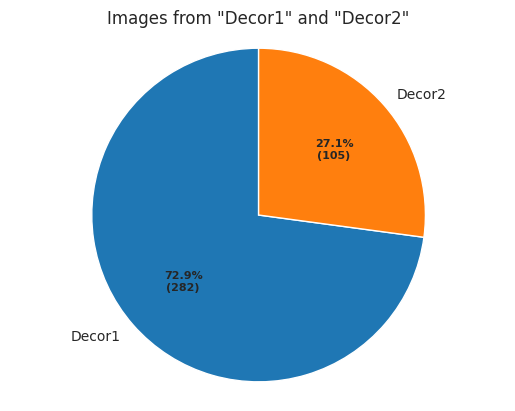

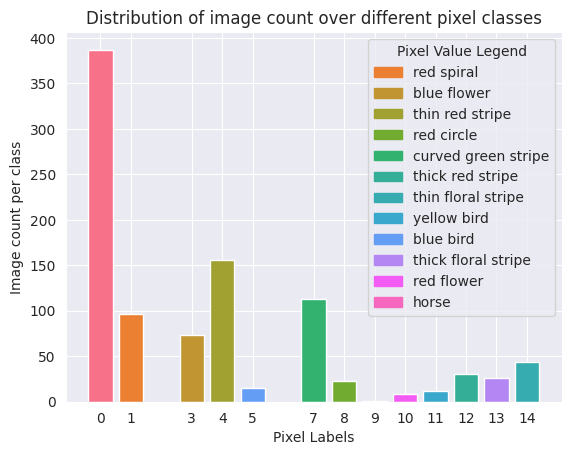

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie chart for number of images starting with "Decor1" and "Decor2"
labels = ['Decor1', 'Decor2']
sizes = [decor1_images, decor2_images]

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, (p/100)*sum(sizes)), startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Images from "Decor1" and "Decor2"')
plt.setp(autotexts, size=8, weight='bold')
plt.savefig('images_decor1_decor2_pie_chart.png')
plt.show()

# Bar plot for number of images containing each pixel value
pixel_values = list(pixel_value_counts.keys())
counts = list(pixel_value_counts.values())

fig2, ax2 = plt.subplots()
colors = sns.color_palette("husl", len(pixel_values))
ax2.bar(pixel_values, counts, color=colors)
plt.title('Distribution of image count over different pixel classes')
plt.xlabel('Pixel Labels')
plt.ylabel('Image count per class')
plt.xticks(pixel_values)

# Add the legend
'''legend_labels = {
    1: "red_spiral_pattern",
    3: "flower_blue",
    4: "thin_straight_red_lins",
    5: "animal_blue_bird",
    7: "curved_green_line",
    8: "red_dot",
    9: "horse",
    10: "flower_red",
    11: "animal_yellow_bird",
    12: "thick_straight_red_line",
    13: "yd_big_flower",
    14: "yd_small_flower"
}'''

# Add the legend
legend_labels = {
    1: "red spiral",
    3: "blue flower",
    4: "thin red stripe",
    5: "blue bird",
    7: "curved green stripe",
    8: "red circle",
    9: "horse",
    10: "red flower",
    11: "yellow bird",
    12: "thick red stripe",
    13: "thick floral stripe",
    14: "thin floral stripe"
}

# Create custom handles for the legend, skipping pixel value 0
handles = [
    plt.Rectangle((0, 0), 1, 1, color=colors[np.where(np.array(pixel_values) == pv)[0][0]], label=legend_labels[pv])
    for pv in pixel_values if pv in legend_labels
]
ax2.legend(handles=handles, title='Pixel Value Legend', loc='best')

plt.savefig('images_pixel_values_bar_plot_with_colored_legend.png')
plt.show()


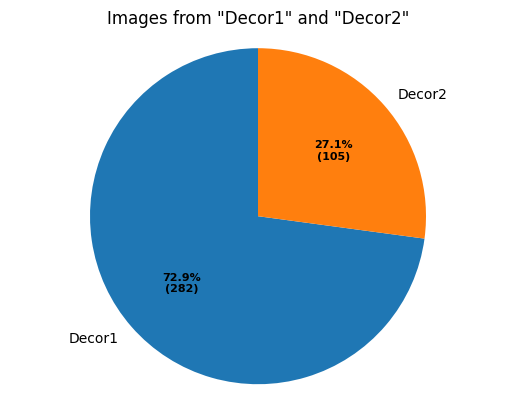

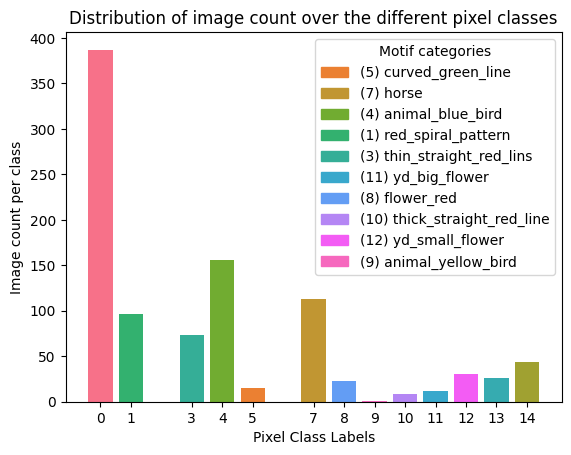

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie chart for number of images starting with "Decor1" and "Decor2"
labels = ['Decor1', 'Decor2']
sizes = [decor1_images, decor2_images]

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, (p/100)*sum(sizes)), startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Images from "Decor1" and "Decor2"')
plt.setp(autotexts, size=8, weight='bold')
plt.savefig('images_decor1_decor2_pie_chart.png')
plt.show()

# Bar plot for number of images containing each pixel value
pixel_values = list(pixel_value_counts.keys())
counts = list(pixel_value_counts.values())

fig2, ax2 = plt.subplots()
colors = sns.color_palette("husl", len(pixel_values))
ax2.bar(pixel_values, counts, color=colors)
plt.title('Distribution of image count over the different pixel classes')
plt.ylabel('Image count per class')
plt.xlabel('Pixel Class Labels')
plt.xticks(pixel_values)

# Add the legend
legend_labels = {
    1: "(1) red_spiral_pattern",
    2: "(2) flower_blue",
    3: "(3) thin_straight_red_lins",
    4: "(4) animal_blue_bird",
    5: "(5) curved_green_line",
    6: "(6) red_dot",
    7: "(7) horse",
    8: "(8) flower_red",
    9: "(9) animal_yellow_bird",
    10: "(10) thick_straight_red_line",
    11: "(11) yd_big_flower",
    12: "(12) yd_small_flower"
}

# Create custom handles for the legend, skipping pixel value 0
handles = [
    plt.Rectangle((0, 0), 1, 1, color=colors[np.where(np.array(pixel_values) == pv)[0][0]], label=legend_labels[pv])
    for pv in pixel_values if pv in legend_labels
]
ax2.legend(handles=handles, title='Motif categories', loc='best')

plt.savefig('images_pixel_values_bar_plot_with_colored_legend.png')
plt.show()

**First proposed Strategy to preprocess images and solve data imbalance problem**

Implementation of the proposed strategy to solve data imbalance:

1. Obtain the foreground masks for each image.
2. Crop each image and mask based on the square covering the fragment region.
3. Resize the cropped images and masks to a standard size, e.g., 256x256 or 512x512 pixels.
4. Assign a new class label to the white-ish color fragment surface, i.e., the remaining parts from motifs. 


In [45]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def create_foreground_mask(image, white_threshold=150):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, white_mask = cv2.threshold(gray_image, white_threshold, 255, cv2.THRESH_BINARY_INV)
    foreground_mask = cv2.bitwise_not(white_mask)

    return foreground_mask

def create_combined_mask(foreground_mask, mask, new_class_label=15):
    white_pixels_in_mask = (mask > 0)
    combined_mask = np.where(white_pixels_in_mask, 0, foreground_mask)
    combined_mask = np.where((mask == 0) & (foreground_mask > 0), new_class_label, combined_mask)
    combined_mask = np.where(mask > 0, mask, combined_mask)

    return combined_mask


def crop_image(img, mask, image_name):
    binary_mask = mask > 0
    rows = np.any(binary_mask, axis=1)
    cols = np.any(binary_mask, axis=0)

    # check if there are any foreground objects
    if not np.any(rows) or not np.any(cols):
        print(f"No foreground objects found in the image: {image_name}")
        return img, mask

    y_min, y_max = np.where(rows)[0][[0, -1]]
    x_min, x_max = np.where(cols)[0][[0, -1]]

    cropped_img = img[y_min:y_max, x_min:x_max]
    cropped_mask = mask[y_min:y_max, x_min:x_max]

    return cropped_img, cropped_mask

def resize_image_and_mask(img, mask, size):
    img = Image.fromarray(img).resize(size, Image.ANTIALIAS)
    mask = Image.fromarray(mask).resize(size, Image.NEAREST)

    return np.array(img), np.array(mask)

def find_image_file(mask_file, image_files):
    for image_file in image_files:
        if mask_file.split('_label')[0] in image_file:
            return image_file
    return None

images_folder = '/content/dataset/images/'
masks_folder = '/content/dataset/masks/'

image_files = os.listdir(images_folder)
mask_files = os.listdir(masks_folder)

# Create a new folder for combined masks
combined_masks_folder = '/content/dataset/combined_masks/'
os.makedirs(combined_masks_folder, exist_ok=True)

# Generate and save combined masks
for file in mask_files:
    img_path = os.path.join(images_folder, find_image_file(file, image_files))
    mask_path = os.path.join(masks_folder, file)

    img = np.array(Image.open(img_path))
    mask = np.array(Image.open(mask_path))

    foreground_mask = create_foreground_mask(img)
    combined_mask = create_combined_mask(foreground_mask, mask)

    combined_mask_img = Image.fromarray(combined_mask)
    combined_mask_img.save(os.path.join(combined_masks_folder, file))

pixel_value_counts = {}

for file in mask_files:
    file_path = os.path.join(combined_masks_folder, file)

    combined_mask = np.array(Image.open(file_path))
    unique_values = np.unique(combined_mask)

    for value in unique_values:
        if value not in pixel_value_counts:
            pixel_value_counts[value] = 1
        else:
            pixel_value_counts[value] += 1

print("Number of images containing each pixel value:")
for value, count in pixel_value_counts.items():
    print(f"Pixel value {value}: {count} images")

Number of images containing each pixel value:
Pixel value 0: 387 images
Pixel value 4: 156 images
Pixel value 15: 387 images
Pixel value 14: 44 images
Pixel value 1: 96 images
Pixel value 12: 31 images
Pixel value 7: 113 images
Pixel value 3: 73 images
Pixel value 8: 23 images
Pixel value 5: 15 images
Pixel value 10: 9 images
Pixel value 13: 26 images
Pixel value 11: 12 images
Pixel value 9: 1 images


Check if it is implemented correctly

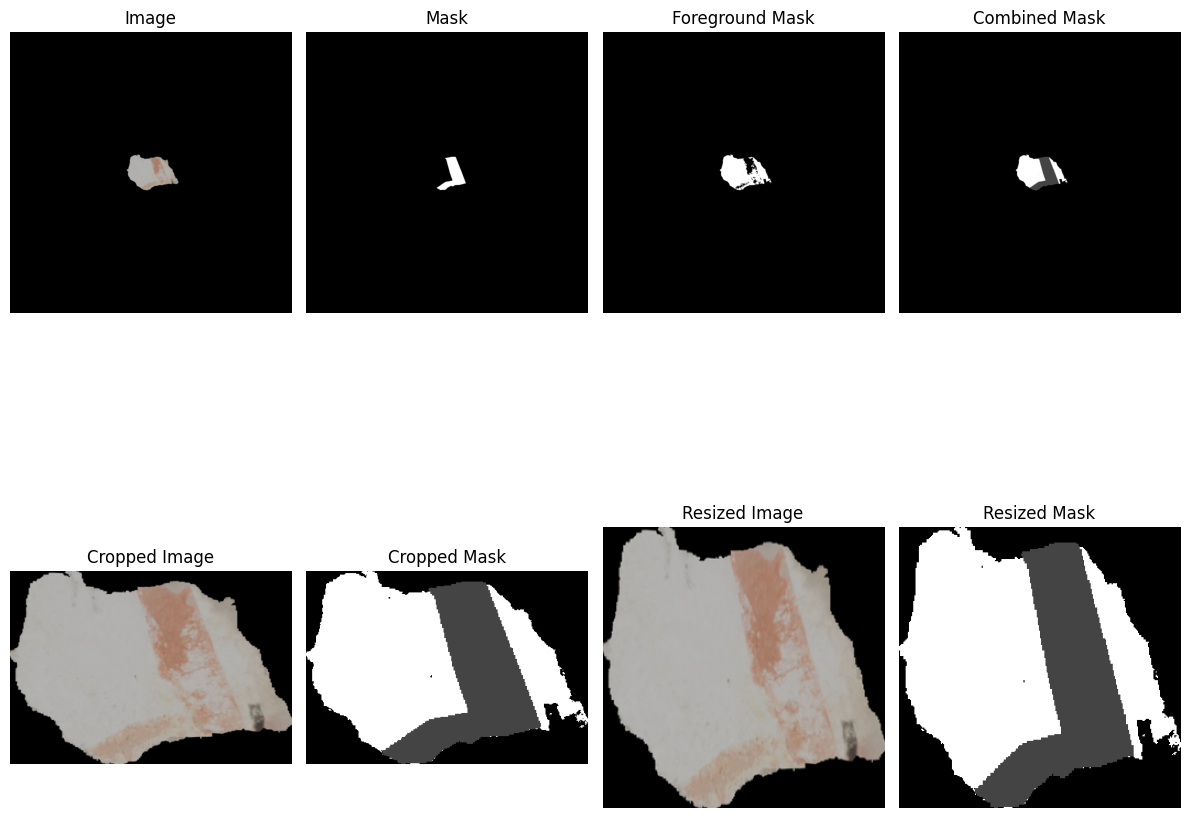

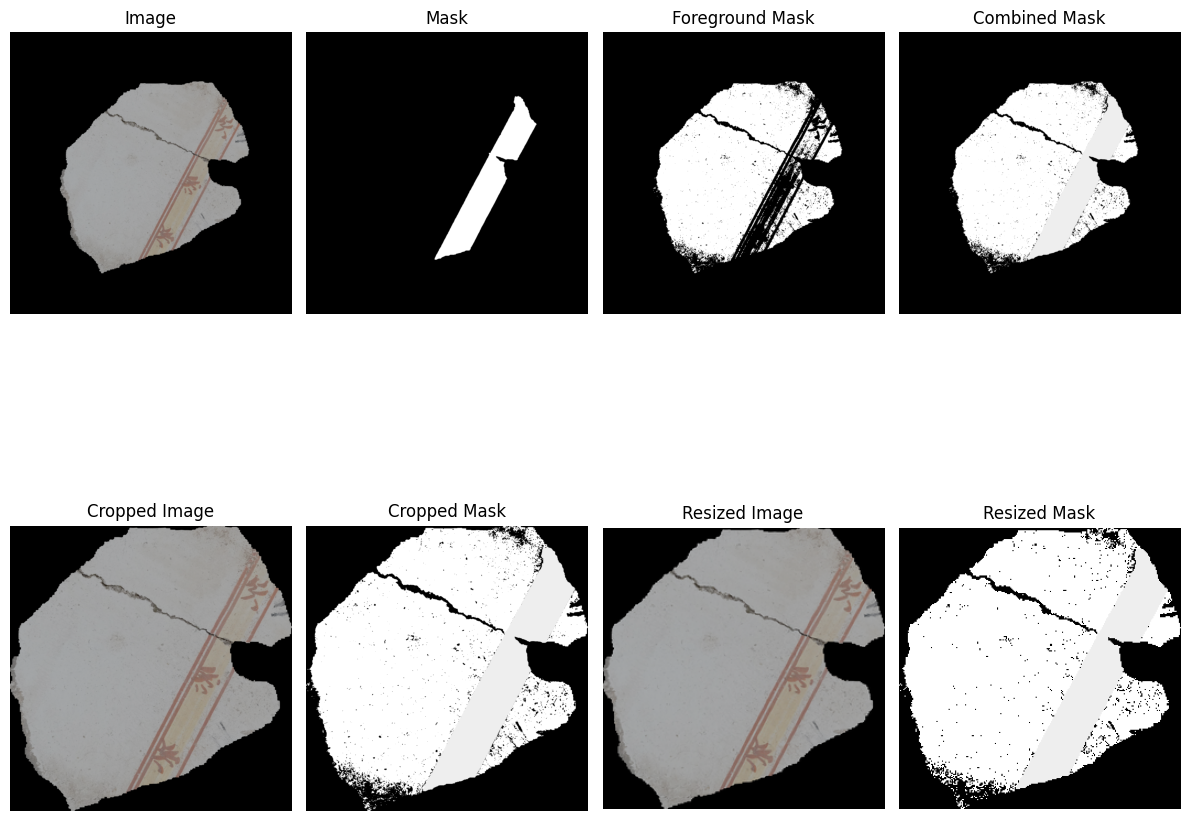

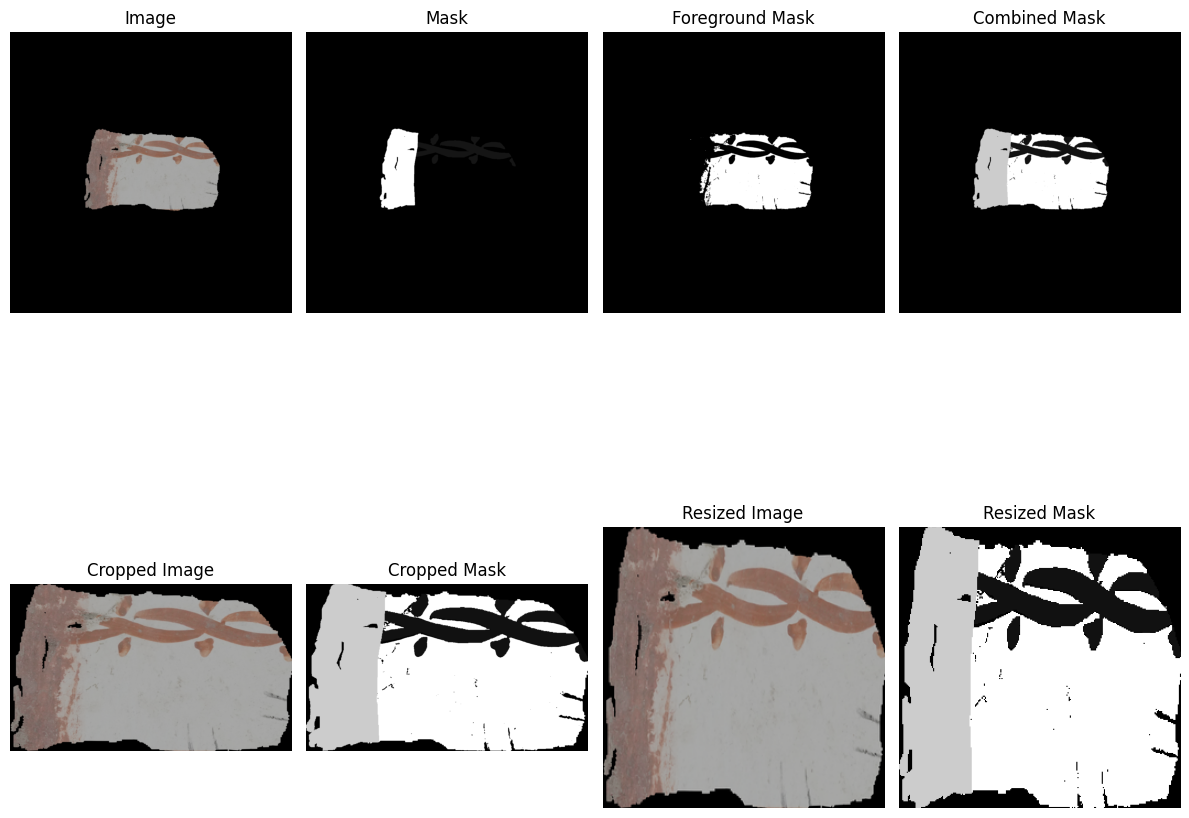

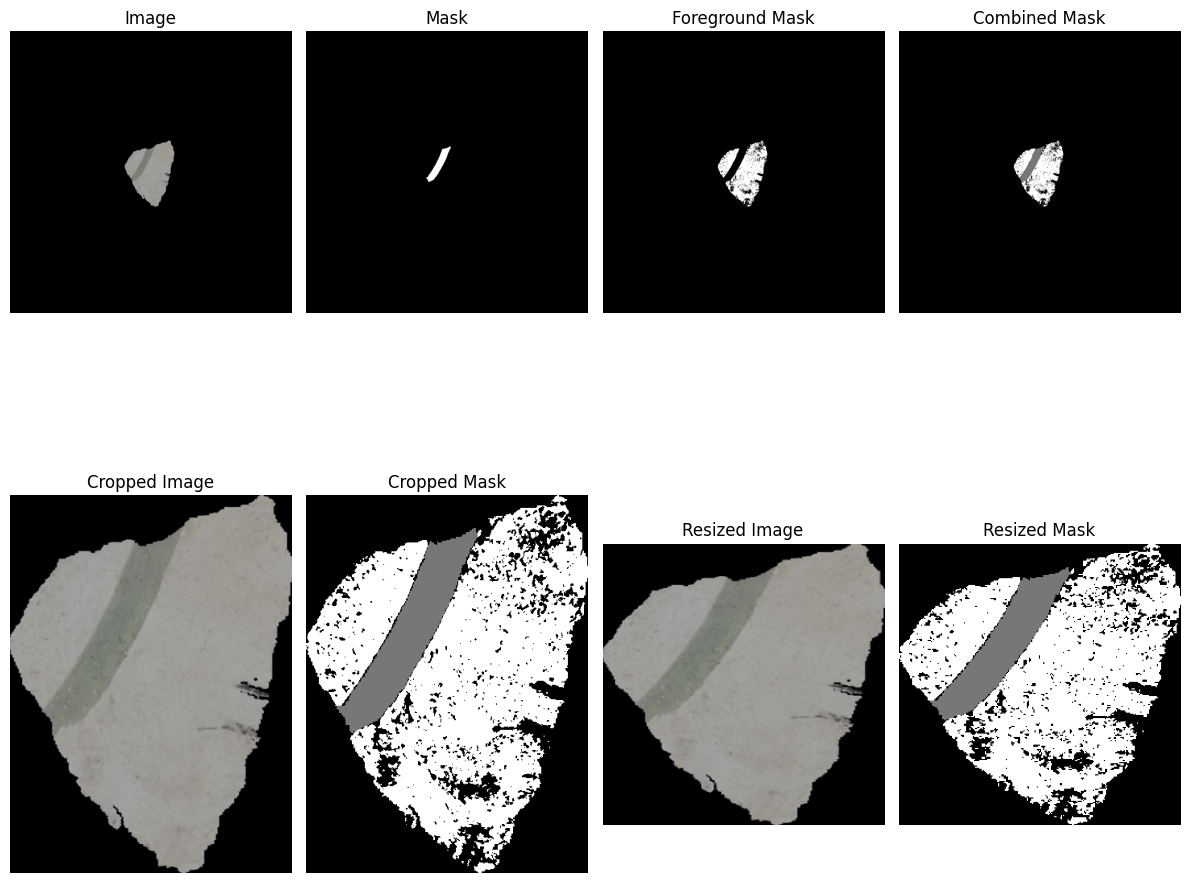

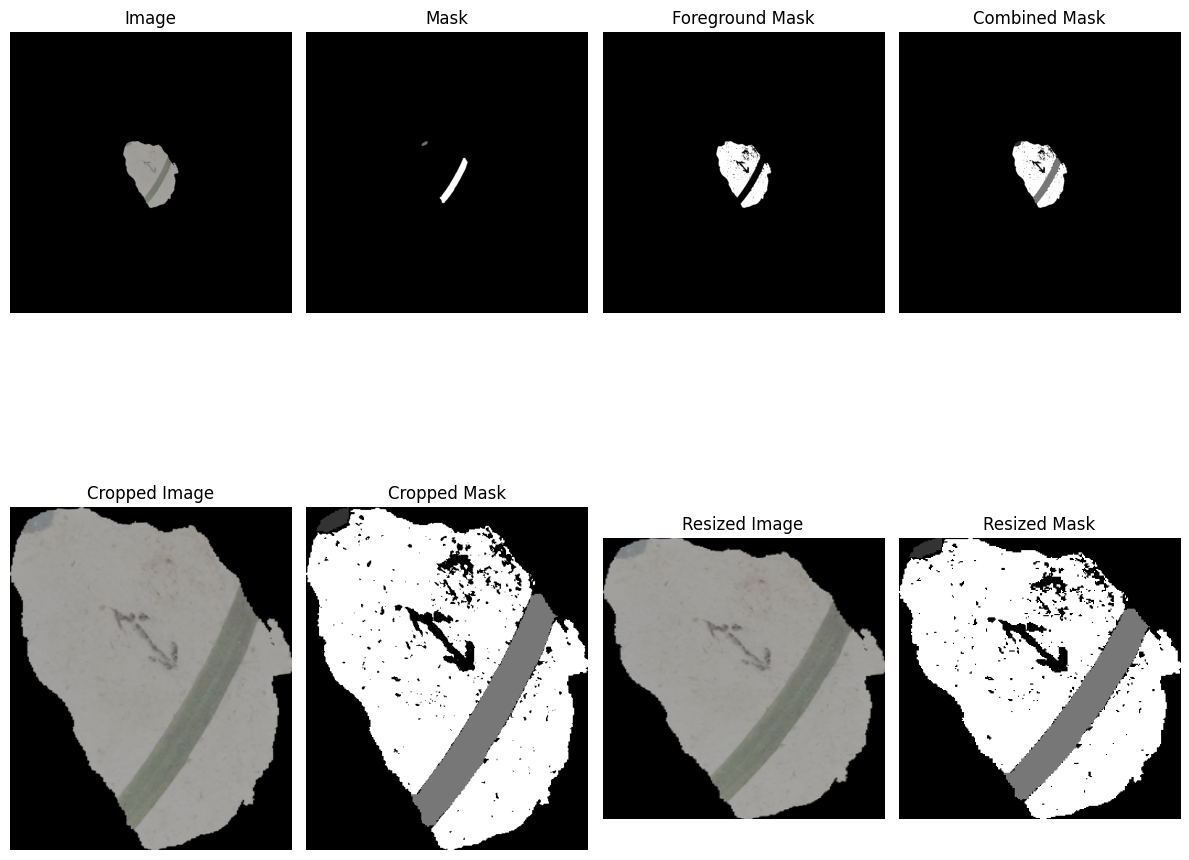

In [ ]:
combined_masks_folder = '/content/dataset/combined_masks/'

def display_images(image_list, title_list, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    axes = axes.ravel()

    for idx, (img, title) in enumerate(zip(image_list, title_list)):
        axes[idx].imshow(img, cmap='gray')
        axes[idx].set_title(title)
        axes[idx].set_axis_off()

    plt.tight_layout()
    plt.show()

# images to visualize
num_images_to_display = 5

for i in range(num_images_to_display):
    mask_file = mask_files[i]
    image_file = find_image_file(mask_file, image_files)

    if image_file is None:
        print(f"Could not find corresponding image file for mask: {mask_file}")
        continue

    img_path = os.path.join(images_folder, image_file)
    mask_path = os.path.join(masks_folder, mask_file)
    combined_mask_path = os.path.join(combined_masks_folder, mask_file)

    img = np.array(Image.open(img_path))
    mask = np.array(Image.open(mask_path))
    combined_mask = np.array(Image.open(combined_mask_path))

    foreground_mask = create_foreground_mask(img)
    cropped_img, cropped_mask = crop_image(img, combined_mask, image_file)
    resized_img, resized_mask = resize_image_and_mask(cropped_img, cropped_mask, (256, 256))

    image_list = [img, mask, foreground_mask, combined_mask, cropped_img, cropped_mask, resized_img, resized_mask]
    title_list = ['Image', 'Mask', 'Foreground Mask', 'Combined Mask',
                  'Cropped Image', 'Cropped Mask', 'Resized Image', 'Resized Mask']

    display_images(image_list, title_list, 2, 4)


Checking unique pixel values of random combined masks

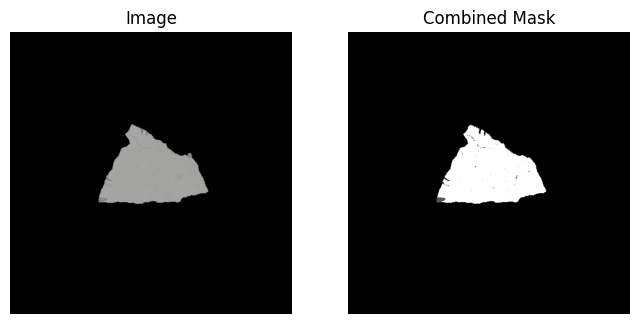

Pixel values and counts for combined mask 'Decor1_RPf_00394_group_48_label_ground-truth_semantic.png':
Pixel value 0: 3738840 pixels
Pixel value 5: 1773 pixels
Pixel value 15: 259387 pixels


In [ ]:
def display_random_image(image_files, mask_files, combined_mask_files):
    random_idx = random.randint(0, len(image_files) - 1)
    mask_file = mask_files[random_idx]
    combined_mask_file = mask_file
    image_file = find_image_file(mask_file, image_files)

    if image_file is None:
        print(f"Could not find corresponding image file for mask: {mask_file}")
        return

    img_path = os.path.join(images_folder, image_file)
    combined_mask_path = os.path.join(combined_masks_folder, combined_mask_file)

    img = np.array(Image.open(img_path))
    combined_mask = np.array(Image.open(combined_mask_path))

    unique_values, counts = np.unique(combined_mask, return_counts=True)
    pixel_value_counts = dict(zip(unique_values, counts))

    plt.figure(figsize=(8, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(combined_mask, cmap='gray')
    plt.title('Combined Mask')
    plt.axis('off')

    plt.show()

    print(f"Pixel values and counts for combined mask '{combined_mask_file}':")
    for value, count in pixel_value_counts.items():
        print(f"Pixel value {value}: {count} pixels")

combined_mask_files = os.listdir(combined_masks_folder)
display_random_image(image_files, mask_files, combined_mask_files)


In [ ]:
mask_filename = 'Decor1_RPf_00394_group_48_label_ground-truth_semantic.png'
mask_path = os.path.join(masks_folder, mask_filename)

mask = np.array(Image.open(mask_path))
unique_pixel_values = np.unique(mask)

print(f"Unique pixel values for '{mask_filename}': {unique_pixel_values}")

Unique pixel values for 'Decor1_RPf_00394_group_48_label_ground-truth_semantic.png': [0 5]


Creating the new dataset

In [ ]:
# define your input and output directories
input_images_folder = "/content/dataset/images/"
input_combined_masks_folder = "/content/dataset/combined_masks/"
output_images_folder = "/content/new_dataset/cropped_resized_images/"
output_masks_folder = "/content/new_dataset/cropped_resized_masks/"

# create output directories if they do not exist
os.makedirs(output_images_folder, exist_ok=True)
os.makedirs(output_masks_folder, exist_ok=True)

# define the target size for resizing
target_size = (256, 256)

# loop through the files in the input directories
image_files = os.listdir(input_images_folder)
mask_files = os.listdir(input_combined_masks_folder)

for mask_file in mask_files:
    image_file = find_image_file(mask_file, image_files)
    if image_file is None:
        print(f"Could not find corresponding image file for mask: {mask_file}")
        continue

    img_path = os.path.join(input_images_folder, image_file)
    mask_path = os.path.join(input_combined_masks_folder, mask_file)

    img = np.array(Image.open(img_path))
    mask = np.array(Image.open(mask_path))

    # crop and resize the image and mask
    cropped_img, cropped_mask = crop_image(img, mask, image_file)
    resized_img, resized_mask = resize_image_and_mask(cropped_img, cropped_mask, target_size)

    # save the resized images and masks to the output directories
    resized_img = Image.fromarray(resized_img)
    resized_img.save(os.path.join(output_images_folder, image_file))

    resized_mask = Image.fromarray(resized_mask)
    resized_mask.save(os.path.join(output_masks_folder, mask_file))

print("Cropped and resized images and masks have been saved.")


Cropped and resized images and masks have been saved.


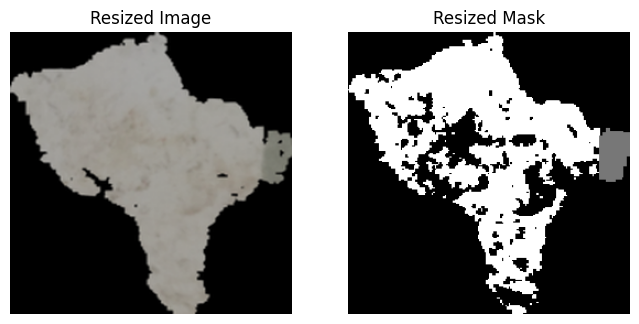

In [ ]:
def display_random_resized_image(image_files, resized_image_files, resized_mask_files):
    random_idx = random.randint(0, len(image_files) - 1)
    mask_file = resized_mask_files[random_idx]
    image_file = find_image_file(mask_file, image_files)
    resized_image_file = find_image_file(mask_file, resized_image_files)

    if image_file is None:
        print(f"Could not find corresponding image file for mask: {mask_file}")
        return

    img_path = os.path.join(output_images_folder, resized_image_file)
    mask_path = os.path.join(output_masks_folder, mask_file)

    img = np.array(Image.open(img_path))
    mask = np.array(Image.open(mask_path))

    plt.figure(figsize=(8, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Resized Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Resized Mask')
    plt.axis('off')

    plt.show()

resized_image_files = os.listdir(output_images_folder)
resized_mask_files = os.listdir(output_masks_folder)
display_random_resized_image(image_files, resized_image_files, resized_mask_files)

Checking the size of image files and mask files

In [ ]:
output_images_folder = "/content/new_dataset/cropped_resized_images/"
output_masks_folder = "/content/new_dataset/cropped_resized_masks/"

image_files = os.listdir(output_images_folder)
mask_files = os.listdir(output_masks_folder)

all_images_256x256 = True
all_masks_256x256 = True

for image_file in image_files:
    img_path = os.path.join(output_images_folder, image_file)
    img = Image.open(img_path)

    if img.size != (256, 256):
        print(f"Image '{image_file}' size: {img.size}")
        all_images_256x256 = False

for mask_file in mask_files:
    mask_path = os.path.join(output_masks_folder, mask_file)
    mask = Image.open(mask_path)

    if mask.size != (256, 256):
        print(f"Mask '{mask_file}' size: {mask.size}")
        all_masks_256x256 = False

if all_images_256x256:
    print("All images are 256x256.")
else:
    print("Some images are not 256x256.")

if all_masks_256x256:
    print("All masks are 256x256.")
else:
    print("Some masks are not 256x256.")


All images are 256x256.
All masks are 256x256.


Checking the unique pixel values in masks  

In [ ]:
output_masks_folder = "/content/new_dataset/cropped_resized_masks/"
mask_files = os.listdir(output_masks_folder)

pixel_value_counts = {}

for mask_file in mask_files:
    mask_path = os.path.join(output_masks_folder, mask_file)
    mask = np.array(Image.open(mask_path))
    
    unique_values = np.unique(mask)

    for value in unique_values:
        if value not in pixel_value_counts:
            pixel_value_counts[value] = 1
        else:
            pixel_value_counts[value] += 1

print("Number of images containing each pixel value:")
for value, count in pixel_value_counts.items():
    print(f"Pixel value {value}: {count} images")

Number of images containing each pixel value:
Pixel value 0: 387 images
Pixel value 4: 156 images
Pixel value 15: 387 images
Pixel value 14: 44 images
Pixel value 1: 96 images
Pixel value 12: 31 images
Pixel value 7: 113 images
Pixel value 3: 73 images
Pixel value 8: 23 images
Pixel value 5: 15 images
Pixel value 10: 9 images
Pixel value 13: 26 images
Pixel value 11: 12 images
Pixel value 9: 1 images


Download the new dataset

In [ ]:
import shutil

# Compress the dataset folder
shutil.make_archive('/content/new_dataset', 'zip', '/content/new_dataset')

# Download the zip file
from google.colab import files
files.download('/content/new_dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>